# **DATA VISUALIZATION INTRO**

[matplotlib.pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)\
Click on above link for supported commands, click on individual command for more details\
[Greek Letter/TeX Syntax](https://www.mathworks.com/help/matlab/creating_plots/greek-letters-and-special-characters-in-graph-text.html)\
Click on the above link for syntax for greek letters and other special characters (TeX Syntax)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **Plot, Subplot Demos**
[Line Graph Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

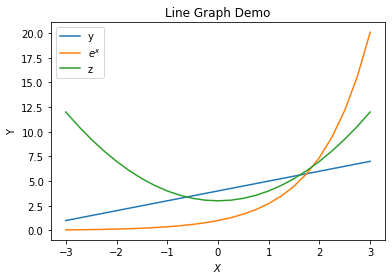

In [2]:
x = np.linspace(-3, 3, 25) #linearly spaced interval w 25 points ranging from -3 to 3
#np.linspace(start, stop, num_steps)
y = x + 4
z = x**2 + 3
plt.figure()
plt.plot(x, y, label='y')
plt.plot(x, np.exp(x), label='$e^{x}$')
plt.plot(x, z, label='z')
plt.xlabel(r'$X$')
plt.ylabel('Y')
plt.title('Line Graph Demo')
plt.legend()
plt.show()
#plt.savefig('myfig.png')

[Box and Whisker Plot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)\
[Histogram Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour)\
[Box Plot Demo](https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html)

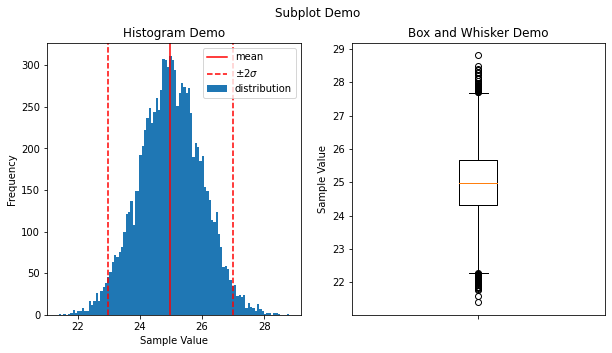

In [3]:
x = np.random.randn(10000) + 25
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].hist(x, bins=100, label='distribution')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Sample Value')
axs[0].set_title('Histogram Demo')
axs[0].axvline(x=np.mean(x), color='red', label='mean')
axs[0].axvline(x=np.mean(x) + 2*np.std(x), color='red', linestyle='--', label='$\pm 2\sigma$')
axs[0].axvline(x=np.mean(x) - 2*np.std(x), color='red', linestyle='--')
axs[0].legend()
axs[1].boxplot(x)
axs[1].set_title('Box and Whisker Demo')
axs[1].set_ylabel('Sample Value')
axs[1].set_xticklabels([])
plt.suptitle('Subplot Demo')
plt.show()

[Scatter Plot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

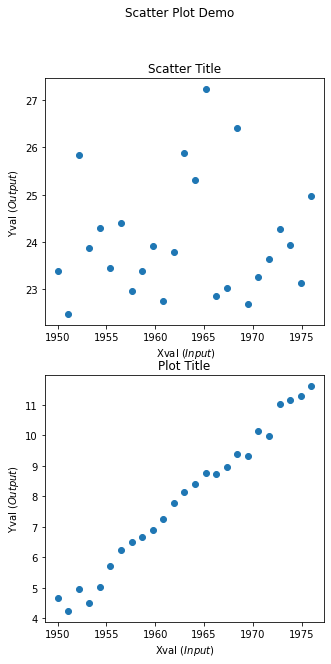

In [4]:
x = np.linspace(0, 26, 25) + 1950
y1 = np.random.randn(len(x)) + 24
y2 = (2/7)*(np.random.randn(len(x)) + x - 1935)
fig, axs = plt.subplots(2, 1, figsize = (5, 10))
axs[0].scatter(x, y1)
axs[0].set_xlabel(r' Xval $(Input)$')
axs[0].set_ylabel(r'Yval $(Output)$')
axs[0].set_title('Scatter Title')
axs[1].plot(x, y2, 'o')
axs[1].set_xlabel(r'Xval $(Input)$')
axs[1].set_ylabel(r'Yval $(Output)$')
axs[1].set_title('Plot Title')
plt.suptitle('Scatter Plot Demo')
plt.show()

Just because your data looks like nonsense does not mean it is not valuable!
\
Showing no correlation can be as helpful as showing correlation

**Other Simple Chart Documentations**\
[Bar Chart Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Bar Chart Demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)\
[Pie Chart Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Pie Chart Demo](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html?highlight=pie)\
[Table Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html#matplotlib.pyplot.table)

Let's take a look at our data!

In [5]:
passing = pd.read_csv("https://raw.githubusercontent.com/rielaben/MSAS_Modules_2021_2022/main/Week%202/nfl_passing_2020.csv")

In [6]:
# PRELIMINARY DATA CLEANSING
strip = lambda char: passing['Player'].str.replace(char, '')
passing['Player'] = strip('*')
passing['Player'] = strip('+')
passing['Pos'] = passing['Pos'].str.upper()
passing.rename({'Tm' : 'Team',
                  'Pos': 'Position',
                  'G' : 'Games Played',
                  'Yds':'Yards',
                  'TD':'Touchdowns',
                  'Int':'Interceptions',
                  'Sk' :'Sacks'
},axis=1, inplace=True)

In [7]:
starting_qbs = passing[(passing['GS']>5) & (passing['Position']=='QB')][['Player', 'Team', 'Age', 'Cmp', 'Att', 'Yards', 'Touchdowns', 'Interceptions', 'Sacks', 'QBR']]
starting_qbs.head(5)

,Player,Team,Age,Cmp,Att,Yards,Touchdowns,Interceptions,Sacks,QBR
0,Deshaun Watson,HOU,25,382,544,4823,33,7,49,70.5
1,Patrick Mahomes,KAN,25,390,588,4740,38,6,22,82.9
2,Tom Brady,TAM,43,401,610,4633,40,12,21,72.5
3,Matt Ryan,ATL,35,407,626,4581,26,11,41,67.0
4,Josh Allen,BUF,24,396,572,4544,37,10,26,81.7


In [8]:
starting_qbs['Cmp%'] = starting_qbs['Cmp']/starting_qbs['Att']
starting_qbs['TD/INT'] = starting_qbs['Touchdowns']/starting_qbs['Interceptions']

In [9]:
qbs_under_25 = starting_qbs[starting_qbs['Age'] < 25].sort_values(by='Cmp%', ascending=False).reset_index(drop=True)[:10]

[Styler documentation](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.html#pandas.io.formats.style.Styler)

In [10]:
disp1 = qbs_under_25.rename({'TD/INT' : 'Touchdown to Interception Ratio',
                  'Cmp%': 'Completion Percentage',
},axis=1)
disp1 = disp1[['Player', 'Touchdown to Interception Ratio', 'Completion Percentage', 'QBR']]
disp1 = disp1.style.bar(subset=['Completion Percentage'], align='left', color=['#d65f5f', '#5fba7d'])
disp1 = disp1.bar(subset=['Touchdown to Interception Ratio'], align='mid', color=['#d65f5f', '#5fba7d'])
disp1 = disp1.background_gradient(subset=['QBR'], cmap='Blues')
disp1 = disp1.set_caption('Quarterbacks Under 25 Years Old <br> Average Completion Percentage = {0}%'.format(round(100*qbs_under_25['Cmp%'].mean(), 2)))
disp1 = disp1.hide_index()
disp1

Player,Touchdown to Interception Ratio,Completion Percentage,QBR
Josh Allen,3.700000,0.692308,81.700000
Kyler Murray,2.166667,0.672043,68.900000
Justin Herbert,3.100000,0.665546,69.500000
Gardner Minshew II,3.200000,0.660550,51.700000
Joe Burrow,2.600000,0.653465,56.200000
Lamar Jackson,2.888889,0.643617,73.700000
Tua Tagovailoa,2.200000,0.641379,52.500000
Daniel Jones,1.100000,0.625000,61.500000
Dwayne Haskins,0.714286,0.614108,31.000000
Sam Darnold,0.818182,0.596154,40.100000


How would you create a bar graph representing AFC North Touchdowns and Interceptions? \
Let's look at the demo for help!

In [11]:
afc_north_qbs = starting_qbs[(starting_qbs['Team'].isin(['GNB', 'DET', 'CHI', 'MIN']))]
afc_north_qbs

,Player,Team,Age,Cmp,Att,Yards,Touchdowns,Interceptions,Sacks,QBR,Cmp%,TD/INT
6,Aaron Rodgers,GNB,37,372,526,4299,48,5,20,84.4,0.707224,9.600000
7,Kirk Cousins,MIN,32,349,516,4265,35,13,39,63.2,0.676357,2.692308
11,Matthew Stafford,DET,32,339,528,4084,26,10,38,68.4,0.642045,2.600000
30,Mitchell Trubisky,CHI,26,199,297,2055,16,8,18,61.3,0.670034,2.000000
32,Nick Foles,CHI,31,202,312,1852,10,8,18,43.3,0.647436,1.250000


In [12]:
afc_north_qbs.columns

Index(['Player', 'Team', 'Age', 'Cmp', 'Att', 'Yards', 'Touchdowns',
       'Interceptions', 'Sacks', 'QBR', 'Cmp%', 'TD/INT'],
      dtype='object')

In [13]:
#LIVE CODE THIS!

The below code block shows how to create line plots. If you are dealing with any kind of data that changes over time and you want to visualize it, then you're probably going to want to use a lineplot. The first time running this cell will produce an ugly graph, but once you uncomment the appropriate lines you'll see how important some basic Matplotlib function can turn it into a real, usable graph. Try messing around with some of this code (comment/uncomment different lines, see what happens), also, try to add something new to the graph by finding something online (change line shape, graph_type, color, dimensions, etc.)

,Rk,Date,G#,Week,Age,Tm,Unnamed: 6,Opp,Result,GS,Cmp,Att,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,Att.1,Yds.2,Y/A.1,TD.1,TD.2,Pts,Fmb,FL,FF,FR,Yds.3,TD.3
0,1.0,9/9/2007,1.0,1.0,30.037,NWE,@,NYJ,W 38-14,*,22,28,78.57,297,3,0,146.6,0,0,10.61,12.75,1,4,4.00,0,0,0,0,NaN,0,0,0,0
1,2.0,9/16/2007,2.0,2.0,30.044,NWE,NaN,SDG,W 38-14,*,25,31,80.65,279,3,1,123.0,2,16,9.00,9.48,1,2,2.00,0,0,0,1,0.0,0,1,0,0
2,3.0,9/23/2007,3.0,3.0,30.051,NWE,NaN,BUF,W 38-7,*,23,29,79.31,311,4,0,150.9,1,3,10.72,13.48,1,2,2.00,0,0,0,1,1.0,0,0,0,0
3,4.0,10/1/2007,4.0,4.0,30.059,NWE,@,CIN,W 34-13,*,25,32,78.13,231,3,1,115.0,0,0,7.22,7.69,2,-2,-1.00,0,0,0,0,NaN,0,0,0,0
4,5.0,10/7/2007,5.0,5.0,30.065,NWE,NaN,CLE,W 34-17,*,22,38,57.89,265,3,0,105.7,0,0,6.97,8.55,0,0,NaN,0,0,0,0,NaN,0,0,0,0
5,6.0,10/14/2007,6.0,6.0,30.072,NWE,@,DAL,W 48-27,*,31,46,67.39,388,5,0,129.6,3,15,8.43,10.61,3,5,1.67,0,0,0,1,1.0,0,0,0,0
6,7.0,10/21/2007,7.0,7.0,30.079,NWE,@,MIA,W 49-28,*,21,25,84.00,354,6,0,158.3,1,10,14.16,18.96,0,0,NaN,0,0,0,0,NaN,0,0,0,0
7,8.0,10/28/2007,8.0,8.0,30.086,NWE,NaN,WAS,W 52-7,*,29,38,76.32,306,3,0,125.5,1,0,8.05,9.63,4,14,3.50,2,2,12,1,1.0,0,0,0,0
8,9.0,11/4/2007,9.0,9.0,30.093,NWE,@,IND,W 24-20,*,21,32,65.63,255,3,2,95.2,2,18,7.97,7.03,5,14,2.80,0,0,0,0,NaN,0,0,0,0
9,10.0,11/18/2007,10.0,11.0,30.107,NWE,@,BUF,W 56-10,*,31,39,79.49,373,5,0,146.1,0,0,9.56,12.13,2,9,4.50,0,0,0,0,NaN,0,0,0,0


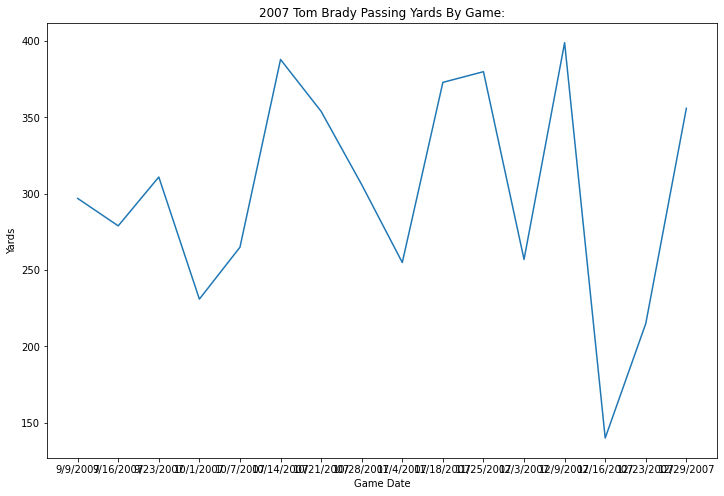

In [14]:
from matplotlib.pyplot import figure

# sets size of figure
figure(figsize=(12, 8))

# import data
# try running this line instead, try to understand why I made the line of code I did on line 9
# tom_brady_2007 = pd.read_csv("https://raw.githubusercontent.com/rielaben/MSAS_Modules_2021_2022/main/Week%205/tom_brady.csv")
# display(tom_brady_2007)
tom_brady_2007 = pd.read_csv("https://raw.githubusercontent.com/rielaben/MSAS_Modules_2021_2022/main/Week%205/tom_brady.csv", skiprows=1)[:-1]
display(tom_brady_2007)

# create line plot with Game on x axis and Yrds on y axis
plt.plot(tom_brady_2007['Date'], tom_brady_2007['Yds'])

# set y-limit of graph
# matplotlib will assume y_limits based on data, unless you set parameters
# in this sitation, we want to set minimum yards to 0 (just makes sense looking at football stats)

# run this cell first with it commented, then uncomment this
# plt.ylim(0, 500)

# ALWAYS remember to include titles for you axes
plt.title("2007 Tom Brady Passing Yards By Game:")
plt.xlabel("Game Date")

# uncommenting this line fills the areas below the line in blue:
# plt.fill_between(tom_brady_2007['Date'], tom_brady_2007['Yds'], alpha=0.7)
# uncommenting this line creates a grid with the graph:
# plt.grid(True)

# uncomment this to see the dates in a redable way
# plt.xticks(rotation=45)
plt.ylabel("Yards")
plt.show()

**Try it yourself!**
\
Ideas: \
*   Pie Chart Comparing Cmp% vs Incmp%
    - Reference pie chart demo
    - Pick a player or some subset of players!
*   Histogram Showing Distribution Y/A, Y/C, Y/G, etc... from big dataset
    - How do we filter the outliers!
*   Scatter plot showing correlation between 2 stats
*   Download as CSV from [this database](https://www.pro-football-reference.com/years/NFL/index.htm) and analyze trends over time (Line Graph)
    - This will take time
    - Requires data cleansing
    - What are you trying to analyze !
*   Be creative!
    - Play with colors, fonts, layouts, labels, subplots, designs, etc
    - Recreate some code from above with different data